# z-statistic vs t-statistic

## Case 1 (t-statistic)

Title: **Small sample hypothesis test**

The mean emission of all engines of a new design needs to be below 20 ppm if the design is to meet the new emission requirements. Ten engines are manufactured for testing purposes, and the emission level of each is determined. The emission data is:

`emissions = [15.6, 16.2, 22.5, 20.5, 16.4, 19.4, 16.6, 17.9, 12.7, 13.9]`

Does the data supply sufficient evidence to conclude that this type of enginee meets the new standard? Assume we're willing to risk a type I error with probability of $\alpha = 0.01$.

### Understand the problem

The problem tackles the emission of the engines. The emission requirements state that all engines should have emission rates lower than 20 ppm and to check that they performed a sampling of engines and tested their respective emissions.

This means that the company is assuming that currently <u>all engines</u> operate at a mean emission rate $= 20 ppm$ until they run a test and prove they can't assume that the <u>population mean</u> $(\mu = 20 ppm)$.

### Generate hypothesis

To generate the hypothesis for this setting we should consider the *status quo* of the problem setting - which is the state of things given nothing has changed. The *status quo* is our null hypothesis and the alternative hypothesis is the state of things given the sample statistic has changed.

- Null hypothesis $(H_{0} = 20 ppm)$: The emission level for the engines is equal to 20 ppm - This is the assumed value prior to the testing.
- Alternative hypothesis $(H_{a} \lt{20 ppm})$: The emission level for the engines is lower than 20 ppm.

### Significance level $(\alpha)$

The significance level $(alpha)$ is the threshold for rejecting the null hypothesis. To pick a significance level we need to gasp the consequences of a possible test error and assess which has the smallest impact if we get it wrong.

| | $H_{o}$ true | $H_{o}$ false |
| ------- | ------- | ------- |
| Reject $H_{o}$ | Type I error | Correct conclusion |
| Fail to reject $H_{o}$ | Correct conclusion | Type II error |

### Type I and type II errors

A Type I error is when we reject a true null hypothesis. Lower values of $\alpha$ make it harder to reject the null hypothesis, so <u>choosing lower values for $\alpha$ can reduce the probability of a Type I error</u>. The consequence here is that if the null hypothesis is false, it may be more difficult to reject using a low value for $\alpha$. So using lower values of $\alpha$ can increase the probability of a Type II error.

A Type II error is when we fail to reject a false null hypothesis. Higher values of $\alpha$ make it easier to reject the null hypothesis, so <u>choosing higher values for $\alpha$ can reduce the probability of a Type II error</u>. The consequence here is that if the null hypothesis is true, increasing $\alpha$ makes it more likely that we commit a Type I error (rejecting a true null hypothesis). The following table summarizes this relationship between significance and the probability of commiting each of the error types:

| | Type I | Type II |
| ------- | ------- | ------- |
| $\alpha$ ↑ | Increase | Decrease |
| $\alpha$ ↓ | Decrease | Increase |

- Type I error: Reject the null hypothesis while it's actually true - i.e. the actual population mean emission rate is 20 ppm but we reject it and conclude that the mean emission is lower than 20 ppm.
- Type II error: Do not reject the null hypothesis while it's actually false - i.e. the actual population mean emission rate is not equal to 20 ppm but we conclude that the mean emission is 20 ppm.

Given both possible errors the worst case scenario would be to encounter a type I error. If we wrongly conclude that the emission is $\lt{20 ppm}$ while it's $= 20 ppm$ it'd cause an environment problem, because we find out that the emissions are lower and we don't recall the design of the engine while we should since the engines are emiting 20 ppm of emission.

The type II error is not as critical as the type I since we'd conclude that the engines should be recalled while they shouldn't. This would only incur in finnancial issues and not put the population/environment at risk.

Therefore the significance level should minimize the type I error setting - which we falsely reject the null hypothesis. Bigger alphas increase the rejection region while smaller alphas decrease it. So given the options 0.1, 0.05 and 0.01 it'd make the most sense to pick the smallest one - i.e. $\alpha = 0.01$.

### Testing setup? z vs t

**Z-test**:
- Used when the population standard deviation $(\sigma)$ is known or when the sample size is large $(n \ge 30)$.
- Relies on the Central Limit Theorem (CLT) to assume a normal distribution of the sample mean.

**T-test**:
- Used when the population standard deviation is unknown and the sample size is small $(n \lt 30)$.
- Assumes the sample mean follows a t-distribution.

Therefore, since $n \lt{30}$ we can't apply the z-test so we fall to the t-test.

### Type of test? One or two-tailed?

Per the definition of the problem and the hypothesis generated, this is a one-tailed test. The alternative hypothesis states that the mean emissions of a sample is <u>less than</u> so we're interested in getting the cummulative probability of observing a sample with a mean equal or even lower than the observed during the experiment.

### Sample statistic

Calculating the sample statistic of interest, which is the sample mean $(\overline{x})$.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# The data
emissions = [15.6, 16.2, 22.5, 20.5, 16.4, 19.4, 16.6, 17.9, 12.7, 13.9]

# "assumed population mean"
pop_mean = 20

# Sample statistics
sample_mean = np.mean(emissions)
sample_std = np.std(emissions)
n = len(emissions) # Sample size

print(f"Sample mean: {sample_mean:.1f}")
print(f"Sample std: {sample_std:.2f}")
print(f"Sample size (n): {n}")

Sample mean: 17.2
Sample std: 2.83
Sample size (n): 10


### Calculate the t-value

The t-value represents the probability of observing a sample statistic as extreme or equal to the observed (experimented) statistic given the null hypothesis is true.
> *Assuming that the population emissions mean is 20 ppm, what's the chance of sampling a sample of $(n = 10)$ that averages an emission mean $\le{17.2} ppm$?*

The **t-value** can also be read as
> *How many standard errors from the samples' mean is this sample mean appart?*.

Note we're using the **standard error** because we're interested in a **sample statistic** (i.e. the mean of a sample). We're interested in the *distance* from the reported population mean so we may write as:
$$
\overline{x} = \mu + t_{value} * SE
$$
$$
\overline{x} - \mu = t_{value} * SE
$$
$$
t_{value} = \frac{\overline{x} - \mu}{SE}
$$

Where the standard error is $SE = \frac{\sigma_{s}}{\sqrt{n}}$

So the final t-value formula is:
$$
t_{value} = \frac{\overline{x} - \mu}{\frac{\sigma_{s}}{\sqrt{n}}}
$$

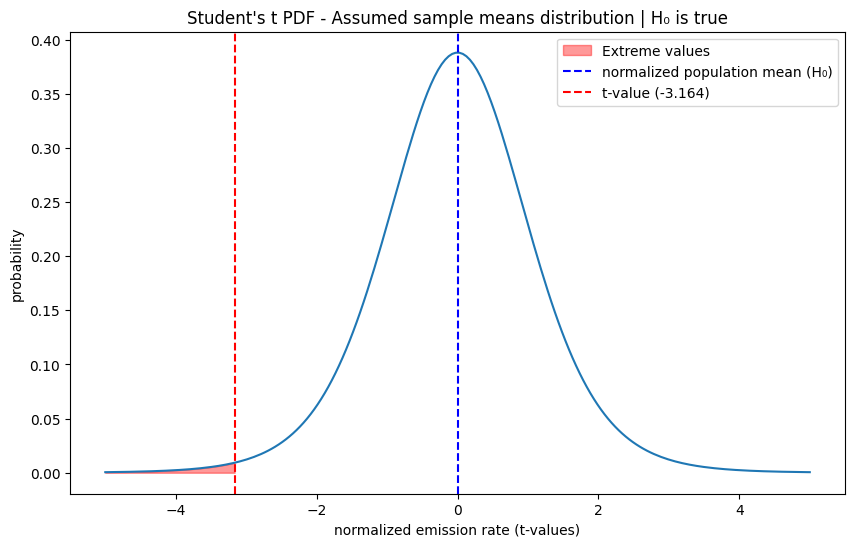

In [3]:
# 100 points evenly spaced between -5.0 and 5.0
x_values = np.linspace(-5.0, 5.0, 200)
# Why -5 and +5? 
# The t-value is a 'multiplier' of standard errors which can be read as:
# "how many SEs is the observed statistic apart from the reported statistic?"
# So I'm considering plotting at least 5 SEs from the normalized statistic

# Generate the probabilities for the PDF
df = n - 1 # Degrees of freedom
probs = stats.t.pdf(x_values, df=df)

# Plot the PDF
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, probs)
ax.set_title("Student's t PDF - Assumed sample means distribution | H₀ is true")
ax.set_xlabel("normalized emission rate (t-values)")
ax.set_ylabel("probability")


# Calculating the t-value
se = sample_std/np.sqrt(n) # Standard error
t_value = (sample_mean - pop_mean)/se

# Highlight the t-value area (extreme values)
x_tval = np.linspace(-5.0, t_value, 100) # 100 points from -5.0 to t-value 
# Calculating each respective prob for each 100 points above
y_tval = stats.t.pdf(x_tval, df=df) # Degrees of freedom
ax.fill_between(x_tval, 0, y_tval, color="red", alpha=0.4, label=f"Extreme values")

# Plotting the population mean and t-statistic
plt.axvline(0, color="blue", linestyle="--", label=f"normalized population mean (H₀)")
plt.axvline(t_value, color="red", linestyle="--", label=f"t-value ({t_value:.3f})")

ax.legend()
plt.show()

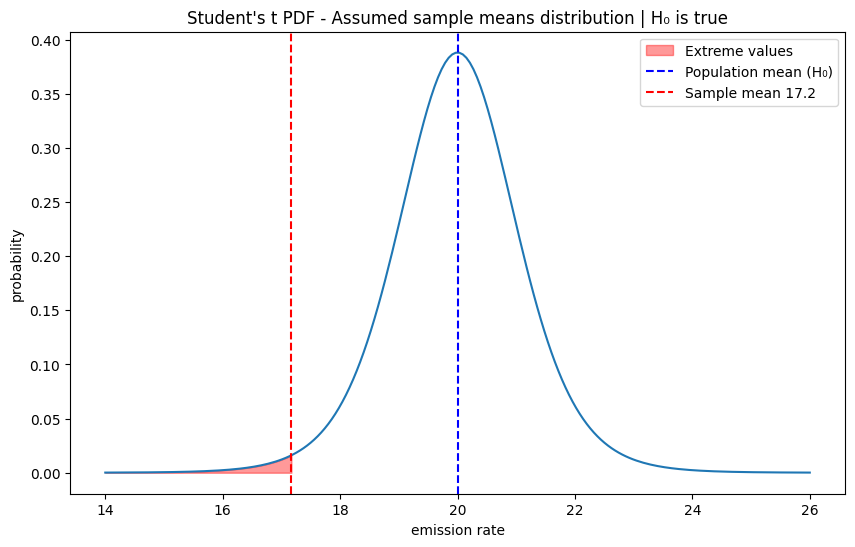

In [4]:
# 100 points evenly spaced between 14 and 26 ppm
x_values = np.linspace(14.0, 26.0, 200)

# Generate the probabilities for the PDF
df = n - 1 # Degrees of freedom
probs = stats.t.pdf(x_values, 
                    df=df,
                    loc=pop_mean) # Now we set the population mean

# Plot the PDF
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, probs)
ax.set_title("Student's t PDF - Assumed sample means distribution | H₀ is true")
ax.set_xlabel("emission rate")
ax.set_ylabel("probability")

# Highlight the t-value area (extreme values)
x_tval = np.linspace(14.0, 
                     sample_mean, # We know that the t-value is our sample mean
                     100) # 100 points
# Calculating each respective prob for each 100 points above
y_tval = stats.t.pdf(x_tval, 
                     loc=20,
                     df=df) # Degrees of freedom
ax.fill_between(x_tval, 0, y_tval, color="red", alpha=0.4, label=f"Extreme values")

# Plotting the population mean and t-statistic
plt.axvline(pop_mean, color="blue", linestyle="--", label=f"Population mean (H₀)")
plt.axvline(sample_mean, color="red", linestyle="--", label=f"Sample mean {sample_mean:.1f}")

ax.legend()
plt.show()

### Calculate the p-value

We calculated the t-value which represents the threshold that marks the area in the pdf that a sample mean of 17.2 ppm or lower can be observed if we keep resampling $(n = 30)$ samples from the population. However, we're interested in the <u>probability</u> of observing a value as low as 17.2 ppm or lower. That's the **p-value**.

In [5]:
p_value = stats.t.cdf(t_value, df=df)
print(f"p-value: {p_value:.4f}")

p-value: 0.0057


Why can't I calculate the area by the second plot approach? (The plot with the 20 ppm mean and 17.2 sample mean)

Like so:
```python
# Wrong!!!
stats.t.cdf(sample_mean, df=df, loc=pop_mean) 
```

Because the `stats.t.cdf` function expects a t-value as its first argument. By providing the sample mean and the population mean you're essentially asking for the Cummulative Distribution Function (CDF) of the t-distribution at the point of the sample mean, <u>but without standardizing it using the standard error</u>.

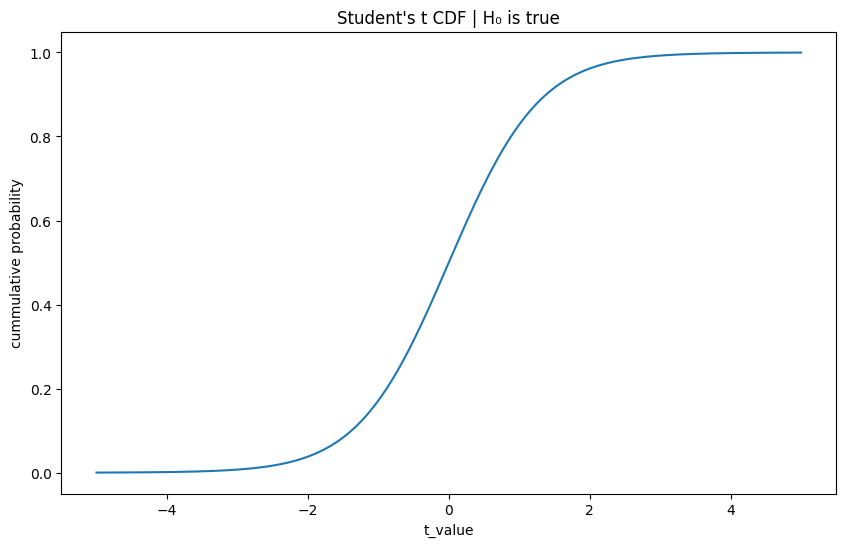

In [6]:
t_values = np.linspace(-5.0, 5.0, 200)
# Calculating the cummulative distribution for each t_values
# Assuming our sample size of n to calculate the degrees of freedom
probs = stats.t.cdf(t_values, df=df)
# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t_values, probs)
ax.set_title("Student's t CDF | H₀ is true")
ax.set_xlabel("t_value")
ax.set_ylabel("cummulative probability")
plt.show()

### Calculate the critical t* (optional)

The **critical t\*** is the convertion of the significance $(\alpha)$ in a t-value (critical t*) which is how far from the population mean I'm considering that it's ok to observe the sample statistic. I.e. if I observe t-values between the critical t* and the normalized population mean (0) then I'd not reject the null hypothesis because it'd be reasonably likely to observe a sample mean by chance given the null hypothesis is right.

In [7]:
alpha = 0.01
critical_t = stats.t.ppf(alpha, df=df)
print(f"Critical t*: {critical_t:.4f}")

Critical t*: -2.8214


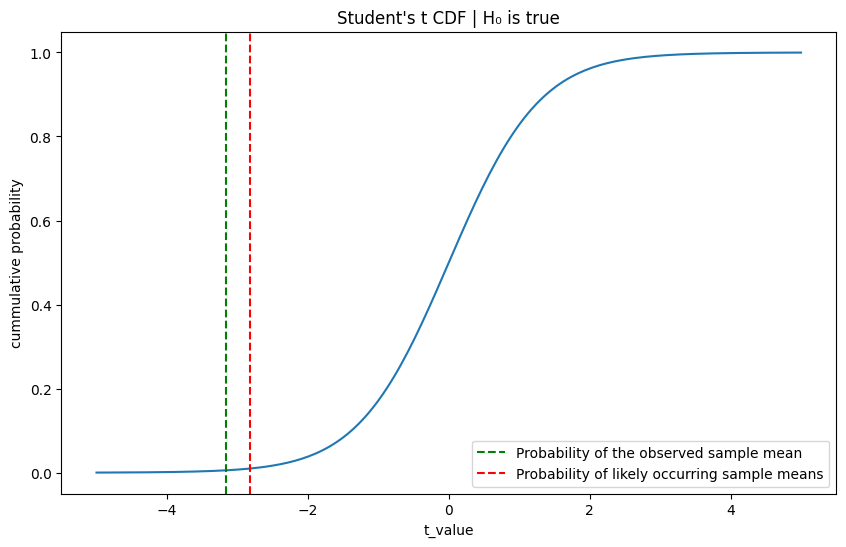

In [8]:
t_values = np.linspace(-5.0, 5.0, 200)
# Calculating the cummulative distribution for each t_values
# Assuming our sample size of n to calculate the degrees of freedom
probs = stats.t.cdf(t_values, df=df)
# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t_values, probs)
ax.set_title("Student's t CDF | H₀ is true")
ax.set_xlabel("t_value")
ax.set_ylabel("cummulative probability")

# t-value vertical line
plt.axvline(x=t_value, color="green", linestyle="--", label="Probability of the observed sample mean")
plt.axvline(x=critical_t, color="red", linestyle="--", label="Probability of likely occurring sample means")
ax.legend()
plt.show()

### Check the p-value against the significance

So with the **p-value** (the probability of observing a value as extreme or less than 17.2 ppm) and the **significance level** $(\alpha)$ (how rare the event needs to be before we consider it statistic significant), we can compare the p-value against the significance level.

- **If p-value < $\alpha$**: Reject the null hypothesis $(H_{0})$, because the sample statistic is unlikely to have occurred by chance alone if the null hypothesis was true.
- **If p-value > $\alpha$**: Fail to reject the null hypothesis $(H_{0})$, because the sample statistic is reasonably likely to have occurred by chance alone if the null hypothesis was true.

In [9]:
if p_value < alpha:
    print(f"Reject null hypothesis, because p-value ({p_value:.4f}) < alpha ({alpha})")
else:
    print(f"Do not reject null hypothesis, because p-value ({p_value:.4f}) > alpha ({alpha})")

Reject null hypothesis, because p-value (0.0057) < alpha (0.01)


## Case 2 (z-statistic)

Title: **Large sample proportion hypothesis test**

We want to test the hypothesis that more than 30% of U.S. households have internet access (with a significance level of 5%). We collect a sample of 150 households and find that 57 have access.

### Understand the problem

This is a <u>*proportions problem*</u> in which we generate a random sample of households and assess whether they do or don't possess internet access. The population proportion is $p = 0.3$ (30%) and the sample proportion is $\hat{p} = 57/150 = 0.38$ (38%).

So basically what we're testing is how probable it is to find a sample proportion by a random chance that is greater than or equal to 38%.

### Generate hypothesis

- Null hypothesis $(H_{0} \le{30}\%)$: The proportion of households that have internet access is less than or equal to 30%. (This is the assumed value prior to the testing).
- Alternative hypothesis $(H_{a} \gt{30}\%)$: The proportion of households that have internet access is greater than 30%.

### Significance level $(\alpha)$

- Type I error: Reject the null hypothesis while it's actually true - i.e. the actual proportion of households with internet access is less than or equal to 30% but we conclude that it's greater than 30%.
- Type II error: Do not reject the null hypothesis while it's actually false - i.e. the actual proportion of households with internet access is greater than 30% but we fail to detect it.

The worst type of error would be the type II when we conclude that the population porportion is less than or equal to 30% when it's actually greater than 30%. So this would incur in finnancial losses with a marketing campain increasing the advertisement to all households about internet packages, for example.

In this case to minimize the type II error we should select a bigger value for $\alpha$. So it makes sense to use $(\alpha = 0.05)$.

### Testing setup? z vs t

The sample size is *greater than or equal to* 30 $(n \ge{30})$ we can use the z-statistic to find the probability of getting a sample with sample proportion *equal or greater than* the observed sample proportion $(\hat{p} = 0.38)$.

### Type of test? One or two-tailed?

This is a one-tailed (right-tailed) test because we're interested in whether the proportion is *greater than* 30%.

In [10]:
# "assumed population proportion"
pop_prop = 0.3
# We can calculate the population std
pop_std = np.sqrt(0.3*(1-0.3)) # std of proportions
# Sample proportion
sample_prop = 0.38
n = 150 # Sample size

# Standard error
se = pop_std/np.sqrt(n)
# z-score
z_score = (sample_prop - pop_prop)/se
print(f"Standard error: {se:.4f}")
print(f"z-score: {z_score:.4f}")

Standard error: 0.0374
z-score: 2.1381


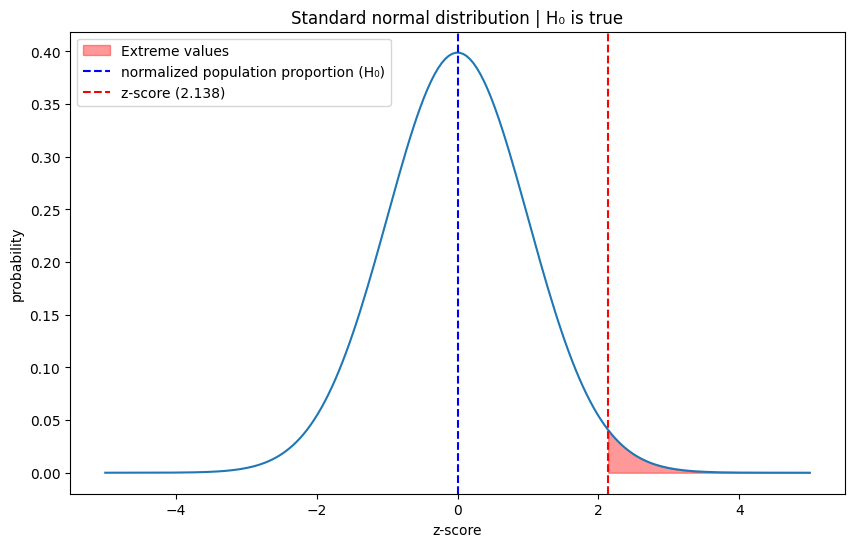

In [11]:
# 100 points evenly spaced between -5.0 and 5.0
x_values = np.linspace(-5.0, 5.0, 200)

# Generate the probabilities for the PDF
probs = stats.norm.pdf(x_values)

# Plot the PDF
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, probs)
ax.set_title("Standard normal distribution | H₀ is true")
ax.set_xlabel("z-score")
ax.set_ylabel("probability")

# Highlight the t-value area (extreme values)
x_zval = np.linspace(z_score, 5.0, 100)
# Calculating each respective prob for each 100 points above
y_zval = stats.norm.pdf(x_zval)
ax.fill_between(x_zval, 0, y_zval, color="red", alpha=0.4, label=f"Extreme values")

# Plotting the population mean and t-statistic
plt.axvline(0, color="blue", linestyle="--", label=f"normalized population proportion (H₀)")
plt.axvline(z_score, color="red", linestyle="--", label=f"z-score ({z_score:.3f})")

ax.legend()
plt.show()

### Calculate the p-value

Since this is a one-tailed test with an alternative hypothesis is that the proportion is greater than 30%, if we integrate the normal distribution to yield the cummulative probability we'd get all the blank area in the plot above. Since all the area in the plot adds to 1.0 (i.e. 100%) we can subtract the whole blank area from the whole area to get the red area - which is the p-value or *the probability of observing a value as extreme or more than the one sampled*.

In [12]:
p_value = 1 - stats.norm.cdf(z_score) # one-tailed test
print(f"p-value: {p_value:.4f}")

p-value: 0.0163


### Calculate the critical z*

The z-critical follows the same logic. We need to find the border in the plot above that places a cummulative probability of 0.05 $(\alpha = 0.05)$. To do so we can find the area responsible for $1 - 0.05 = 0.95$ of the cummulative probability. After this point any sample statistic observed should not be considered *by chance* and there's something actually going on here.

In [13]:
alpha = 0.05
critical_z = stats.norm.ppf(1 - alpha) # 0.95
print(f"Critical z*: {critical_z:.4f}")

Critical z*: 1.6449


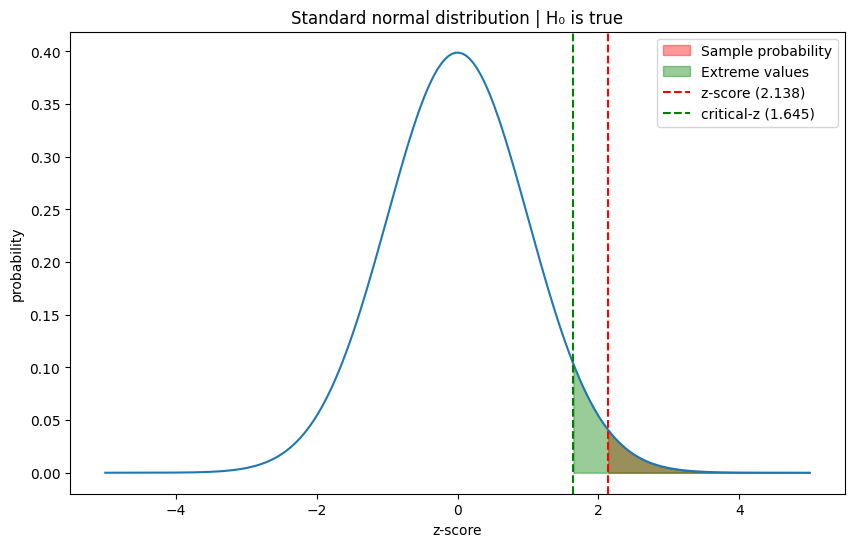

In [14]:
# 100 points evenly spaced between -5.0 and 5.0
x_values = np.linspace(-5.0, 5.0, 200)

# Generate the probabilities for the PDF
probs = stats.norm.pdf(x_values)

# Plot the PDF
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, probs)
ax.set_title("Standard normal distribution | H₀ is true")
ax.set_xlabel("z-score")
ax.set_ylabel("probability")

# Highlight the z-value area (extreme values)
x_zval = np.linspace(z_score, 5.0, 100)
# Calculating each respective prob for each 100 points above
y_zval = stats.norm.pdf(x_zval)
ax.fill_between(x_zval, 0, y_zval, color="red", alpha=0.4, label=f"Sample probability")

# Highlight the critical z area
x_zval = np.linspace(critical_z, 5.0, 100)
y_zval = stats.norm.pdf(x_zval)
ax.fill_between(x_zval, 0, y_zval, color="green", alpha=0.4, label=f"Extreme values")

# Plotting the population mean and t-statistic
plt.axvline(z_score, color="red", linestyle="--", label=f"z-score ({z_score:.3f})")
plt.axvline(critical_z, color="green", linestyle="--", label=f"critical-z ({critical_z:.3f})")

ax.legend()
plt.show()

So we "accept" any sample statistic in the blank area up to the green line, which is our significance level and afterwards any sample statistic observed may not be considered a event by chance alone. So it seems that there's enough evidence to reject the null hypothesis in favor to the alternative. So we may conclude that more than 30% of U.S. households have internet access.

In [15]:
if p_value < alpha:
    print(f"Reject null hypothesis, because p-value ({p_value:.4f}) < alpha ({alpha})")
else:
    print(f"Do not reject null hypothesis, because p-value ({p_value:.4f}) > alpha ({alpha})")

Reject null hypothesis, because p-value (0.0163) < alpha (0.05)
